# A simple clustering exercise of Fund Programs

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xls=pd.ExcelFile('clustering_data_full.xlsx')
df=pd.read_excel(xls,'Cluster1')

In [11]:
df.head(5)

,country_name,country_code,country_iso_3_code,code,region,Program yes no,year,bca_gdp_bp6,d_gdp,iar_gdp_bp6,...,ggxwdg_gdp,ngdpd,ngdp_rpch,pcpie_pch,VoiceandAccountability,PoliticalStability,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
0,United States,111,USA,1112011,WHD,0,2011,-2.86501,98.4494,3.46075,...,99.9371,15517.9,1.60158,3.085660,1.531901,1.408850,1.613344,1.601585,1.629249,1.562158
1,United States,111,USA,1112012,WHD,0,2012,-2.63814,96.6345,3.54292,...,103.4860,16155.3,2.22395,1.821510,1.539356,1.418869,1.615286,1.568815,1.634575,1.591421
2,United States,111,USA,1112013,WHD,0,2013,-2.09414,97.8010,2.68600,...,105.3410,16691.5,1.67734,1.336660,1.526712,1.421438,1.614160,1.561928,1.620821,1.571375
3,United States,111,USA,1112014,WHD,0,2014,-2.14487,98.4585,2.49174,...,105.0160,17427.6,2.56915,0.546823,1.519781,1.406690,1.602934,1.564739,1.631292,1.584339
4,United States,111,USA,1112015,WHD,0,2015,-2.39835,95.1253,2.11692,...,105.2350,18120.7,2.86169,0.739290,1.528172,1.429848,1.602168,1.559440,1.628480,1.588606


In [12]:
#matrix size
df.shape

(1351, 28)

## Metadata from STATA

    Contains data from C:\Users\CIntal\OTmp\master_comparator_data.dta
    obs:         8,299                         
    vars:            39                          20 Feb 2018 20:27
    size:     2,373,514                         
    ---------------------------------------------------------------------------------------------------------------
                  storage   display    value
    variable name   type    format     label      variable label
    --------------------------------------------------------------------------------------------------------------
    country_name    str130  %130s                 Country.Name
    country_code    int     %10.0g                Country.Code
    country_iso_3~e str3    %9s                   Country.ISO-3 code
    year            float   %9.0g                 year
    bca_gdp_bp6     float   %8.0g                 Balance on goods and services, percent of GDP in U.S. dollars
    bfd_gdp_bp6     float   %8.0g                 Direct investment, (BPM6), percent of GDP in U.S. dollars
    d_gdp           float   %8.0g                 Total external debt, gross, percent of GDP in U.S. dollars
    ggxcnl_gdp      float   %8.0g                 General govt net lending/borrowing, national currency, percent
                                                    of fiscal year GDP
    ggxofb_gdp      float   %8.0g                 General government overall fiscal balance, percent of Fiscal
                                                    year GDP
    ggxwdg_gdp      float   %8.0g                 General government gross debt, percent of Fiscal year GDP
    iar_gdp_bp6     float   %8.0g                 Reserve Assets (Inc. reserve position in the Fund and SDR 
                                                    holdings), percent of GDP in U.S. dollars
    ngdpd           float   %8.0g                 Gross domestic product, current prices in U.S. dollars
    ngdpdpc         float   %8.0g                 Gross domestic product per capita, current prices in U.S. dollars
    ngdp_rpch       float   %8.0g                 GDP, constant prices in national currency, percent change
    pcpie_pch       float   %8.0g                 Consumer Prices, end-of-period, percent change
    PRGT            int     %10.0g                Dummy
    gra_credit      double  %10.0g                GRA Credit Outstanding
    prgt_credit     long    %10.0g                PRGT Credit Outstanding
    quota           double  %10.0g                Quota
    arrangement_t~e str16   %16s                  Arrangement Type
    exceptional_a~s byte    %10.0g                Exceptional Access
    precautionary   byte    %10.0g                Precautionary (Using MONA)
    actual_expiry   int     %10.0g                Actual Expiry Year
    post2011        float   %9.0g                
    region          str6    %9s                   Region
    small_state     byte    %10.0g                Small State
    fuel_exporter   byte    %10.0g                Fuel Exporter
    exchange_rate   float   %9.0g                
    trade_openness  float   %9.0g                
    fragile         byte    %10.0g               
    iip             double  %10.0g               
    prg_length      float   %9.0g                 Program Length
    eff             float   %9.0g                
    sba             float   %9.0g                
    pll             float   %9.0g                
    ecf             float   %9.0g                
    esf             float   %9.0g                
    scf             float   %9.0g                
    blend           float   %9.0g    
    DCP             float   %9.0g                 Domestic Credit to the Private Sector (% of GDP)

    ICRG variables added:
    Bureaucracy Quality (L)
    Corruption (F)
    Democratic Accountability (K)
    Ethnic Tensions (J)
    External Conflict (E)
    Government Stability (A)
    Internal Conflict (D)
    Investment Profile (C)
    Law & Order (I)
    Military in Politics (G)
    Religious Tensions (H)
    Socioeconomic Conditions (B)

    --------------------------------------------------------------------------------------------------------------

    Sorted by: country_code  year

## To do list:
1) Regularize  
2) Straightforward clustering    
3) Dimensionality reduction - PCA  
4) Try LASSO on a poission regression  (predicting program membership)

#### Start with the following:
bca_gdp_bp6 d_gdp iar_gdp_bp6 ngdpdpc small_state fuel_exporter fragile exchange_rate trade_openness

#### Regularization

In [13]:
#columns seven until twentysix is the full sample; 7-16 is the smaller df. note that row 7 is the time dimension.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 6:16])
df1=pd.DataFrame(X_scaled)
df1.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-1.5,0.047191,0.216962,-0.820355,1.840298,-0.454148,-0.411943,-0.467134,1.298103,-0.861645
1,-1.0,0.067276,0.200902,-0.816194,1.925956,-0.454148,-0.411943,-0.467134,1.298103,-0.844845
2,-0.5,0.115439,0.211225,-0.859581,1.994432,-0.454148,-0.411943,-0.467134,1.298103,-0.863153
3,0.0,0.110947,0.217043,-0.869416,2.093054,-0.454148,-0.411943,-0.467134,1.298103,-0.849050
4,0.5,0.088506,0.187546,-0.888394,2.183165,-0.454148,-0.411943,-0.467134,1.298103,-0.849050


### Trial 1: Straightforward Clustering

In [14]:
%matplotlib inline
from collections import Counter
import random
from sklearn import cluster, metrics

**First, we must determine how many clusters we need.**

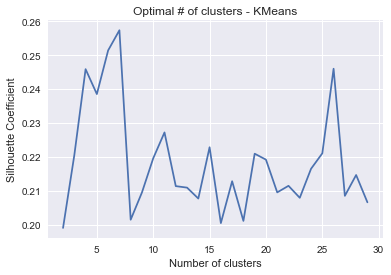

In [21]:
# calculate SC for K=2 through K=15
k_range = range(2,30)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # of clusters - KMeans')
plt.grid(True)

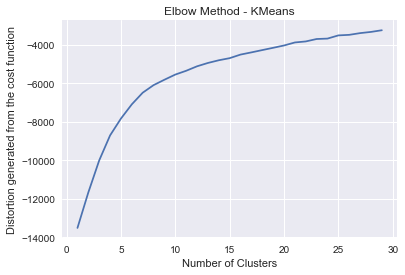

In [16]:
from sklearn.cluster import KMeans
import pylab as pl
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Distortion generated from the cost function')
pl.title('Elbow Method - KMeans')
pl.show()

No elbow.

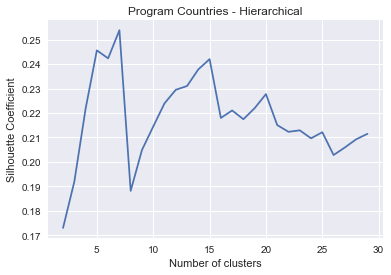

In [23]:
# calculate SC for K=2 through K=30
from sklearn.cluster import AgglomerativeClustering
k_range = range(2, 30)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Program Countries - Hierarchical')
plt.grid(True)

7 clusters seem to be ideal.

In [18]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

df['cluster'] = ms.labels_
df.sort_values(by='cluster')
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='MS')
writer.save()

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
labels = ms.labels_
print(Counter(labels))

number of estimated clusters : 9
Counter({0: 1186, 3: 36, 6: 30, 5: 26, 7: 22, 1: 21, 2: 18, 4: 11, 8: 1})


Meanshift clustering shows 9 clusters.

#### Testing K-Means on 7 clusters.

In [25]:
# K-means with 7 clusters on scaled data
km = cluster.KMeans(n_clusters=7, random_state=14)
km.fit(X_scaled)
df['cluster'] = km.labels_
df.sort_values(by='cluster')

writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='KM')
writer.save()

labels = km.labels_
print(Counter(labels))

Counter({0: 500, 5: 230, 2: 212, 3: 175, 1: 158, 6: 55, 4: 21})


In [26]:
# Supplementary: run Hierarchical clustering
# Fit an estimator
hc = AgglomerativeClustering(n_clusters=7)
hc.fit(X_scaled)

# Clusters are given in the labels_ attribute
df['cluster'] = hc.labels_
df.sort_values(by='cluster')
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='HC')
writer.save()

labels = hc.labels_
print(Counter(labels))

Counter({0: 508, 1: 234, 2: 208, 3: 167, 5: 155, 4: 58, 6: 21})


## Trial 2. PCA (dimensionality reduction), then Clustering

In [27]:
#Grabbing metadata for future use
metadata=df.iloc[:, 0:7]
metadata.head(5)

,country_name,country_code,country_iso_3_code,code,region,Program yes no,year
0,United States,111,USA,1112011,WHD,0,2011
1,United States,111,USA,1112012,WHD,0,2012
2,United States,111,USA,1112013,WHD,0,2013
3,United States,111,USA,1112014,WHD,0,2014
4,United States,111,USA,1112015,WHD,0,2015


In [38]:
#define X as the features; y as the program

X = df.iloc[:,6:16].values
y = df.iloc[:,5].values #beginning in value 6

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [39]:
#Define correlation matrix and perform eigendecomposition
cor_mat1 = np.corrcoef(X_std.T) #correlations of standardized data
cor_mat2 = np.corrcoef(X.T) #correlations of raw data

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  3.32266161e-02  -4.48387253e-02  -1.79946350e-02   8.92483547e-01
    3.70632798e-01  -2.46804002e-01  -1.39598077e-02  -3.79599114e-02
   -1.08656606e-02  -1.11319686e-04]
 [ -3.66055473e-01   2.41115987e-01   4.60583763e-01   4.31390258e-02
   -1.05532024e-01  -1.59083144e-01   3.61028539e-01   1.85238230e-01
   -4.26383889e-01  -4.59309927e-01]
 [ -3.98408097e-01   4.24496077e-02  -3.20358003e-01   1.77309790e-01
   -1.04667277e-01   4.70674748e-01  -5.31254619e-01   5.84553737e-02
   -7.76057822e-02  -4.25722787e-01]
 [  4.89075053e-02   3.41483731e-01  -7.38905751e-03  -1.39724609e-01
    7.28667777e-01   5.12385446e-01   2.52235802e-01   5.59698476e-02
   -2.70863891e-02   2.08466400e-02]
 [ -5.43959200e-01   2.42738397e-01   5.40993540e-02   4.49248762e-02
   -4.64380707e-02  -8.12046070e-02   1.63239648e-01   6.18261049e-02
    7.69101999e-01   9.74846478e-02]
 [  3.04365000e-01   4.46544555e-01  -3.95724537e-01  -2.92307517e-02
   -5.41901520e-02  -2.98799070

In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.02393402132
1.60477215312
1.35443749843
1.01386333831
0.996113218135
0.802214451148
0.733816835839
0.579425639383
0.45033911931
0.441083725001


In [42]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

x_bar= ['PC %s'%i for i in range(1,10)]
y_bar= var_exp[:9]

x_line= ['PC %s' %i for i in range(1,10)] 
y_line= cum_var_exp[:9]

chart = pd.DataFrame(
    {'pca #1': x_bar,
     'variance explained': y_bar,
     'pca#2':x_line,
     'cumulative variance':y_line,
    })

print(chart)

   cumulative variance pca #1 pca#2  variance explained
0            20.239340   PC 1  PC 1           20.239340
1            36.287062   PC 2  PC 2           16.047722
2            49.831437   PC 3  PC 3           13.544375
3            59.970070   PC 4  PC 4           10.138633
4            69.931202   PC 5  PC 5            9.961132
5            77.953347   PC 6  PC 6            8.022145
6            85.291515   PC 7  PC 7            7.338168
7            91.085772   PC 8  PC 8            5.794256
8            95.589163   PC 9  PC 9            4.503391


**Am happy with 6 PCAs amounting to 85% variance**

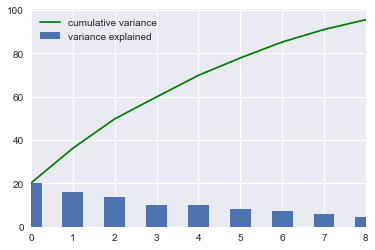

In [43]:
chart['variance explained'].plot(kind='bar')
chart['cumulative variance'].plot(kind='line', color='green')
plt.legend()

In [44]:
from sklearn.decomposition import PCA
from scipy import stats

pca = PCA(n_components=6)
Y_sklearn = pca.fit_transform(X_std)

Now it's time to cluster the 6 PCA components. But first, let's convert to a df and combine with the metadata.

In [46]:
pca_df = pd.DataFrame(Y_sklearn)
#outer join with metadata
#pca_df = pd.concat([metadata, pca_df], axis=1)

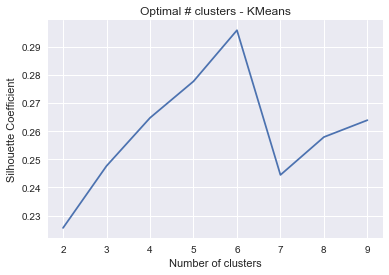

In [52]:
# calculate SC for K=2 through K=30
k_range = range(2, 10)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(pca_df)
    scores.append(metrics.silhouette_score(pca_df, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # clusters - KMeans')
plt.grid(True)

<b> 6 clusters showing.

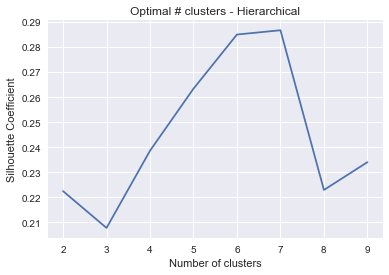

In [51]:
# calculate SC for K=2 through K=70
from sklearn.cluster import AgglomerativeClustering
k_range = range(2, 10)
scores = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(pca_df)
    scores.append(metrics.silhouette_score(pca_df, hc.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # clusters - Hierarchical')
plt.grid(True)

<b> Hierarchical clusters at 6-7 clusters.

In [56]:
# K-means has the slightly higher silhouette score.  Proceed with 6 clusters on PCA data
km = cluster.KMeans(n_clusters=6, random_state=14)
km.fit(pca_df)
df['cluster'] = km.labels_
df.sort_values(by='cluster')

writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='PCA_KM')
writer.save()

labels = km.labels_
print(Counter(labels))

Counter({2: 498, 0: 242, 4: 216, 1: 187, 3: 151, 5: 57})


In [57]:
# Fit an estimator
hc = AgglomerativeClustering(n_clusters=6)
hc.fit(pca_df)

# Clusters are given in the labels_ attribute
df['cluster'] = hc.labels_
df.sort_values(by='cluster')
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='PCA_HC')
writer.save()

labels = hc.labels_
print(Counter(labels))

Counter({1: 507, 0: 240, 3: 210, 4: 196, 5: 134, 2: 64})


References: https://plot.ly/ipython-notebooks/principal-component-analysis/